## Косарский Иван, ПМИ-3

## Регрессия

### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import Counter

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [2]:
df = pd.read_excel('Real estate valuation data set.xlsx')

df = df.drop(['No'], axis=1)
feature_names = df.columns[0:-1]

print(df.head())
print(feature_names)

   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0          2012.916667          32.0                                84.87882   
1          2012.916667          19.5                               306.59470   
2          2013.583333          13.3                               561.98450   
3          2013.500000          13.3                               561.98450   
4          2012.833333           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2                        47.3  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


### Анализ набора данных

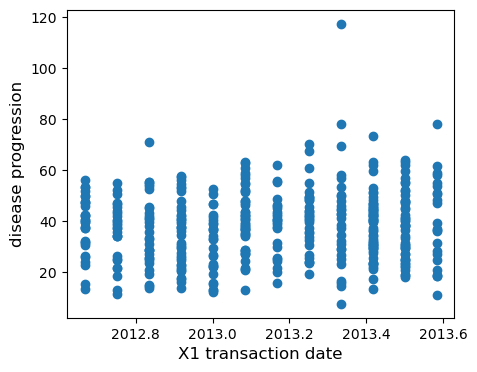

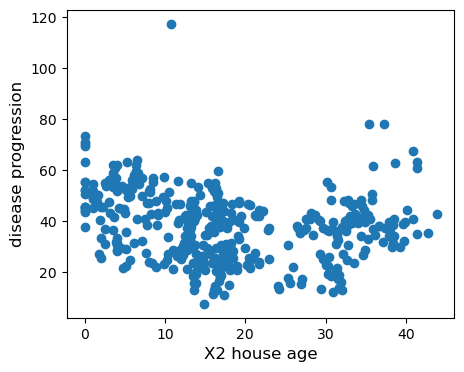

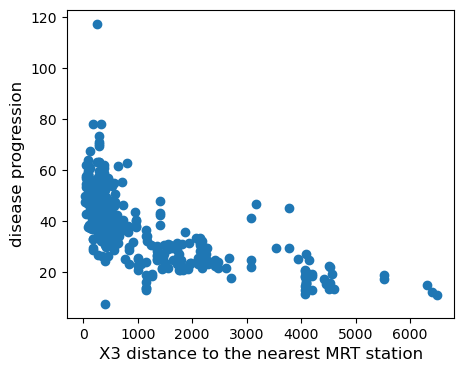

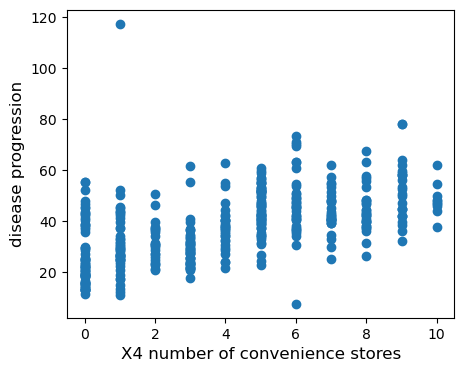

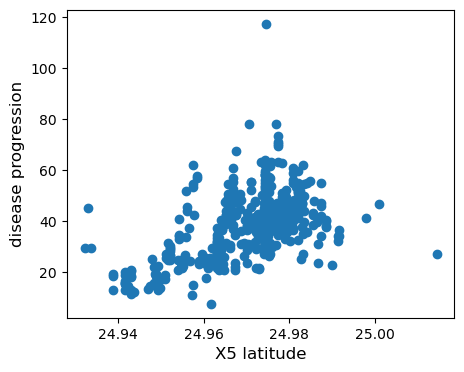

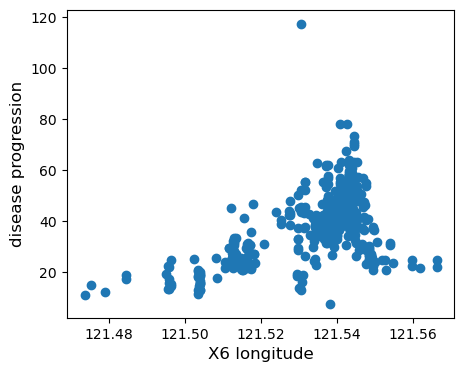

In [4]:
for index, feature_name in enumerate(feature_names):
    plt.figure(figsize=(5, 4))
    plt.scatter(df[feature_name], df['Y house price of unit area'])
    plt.ylabel('disease progression', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

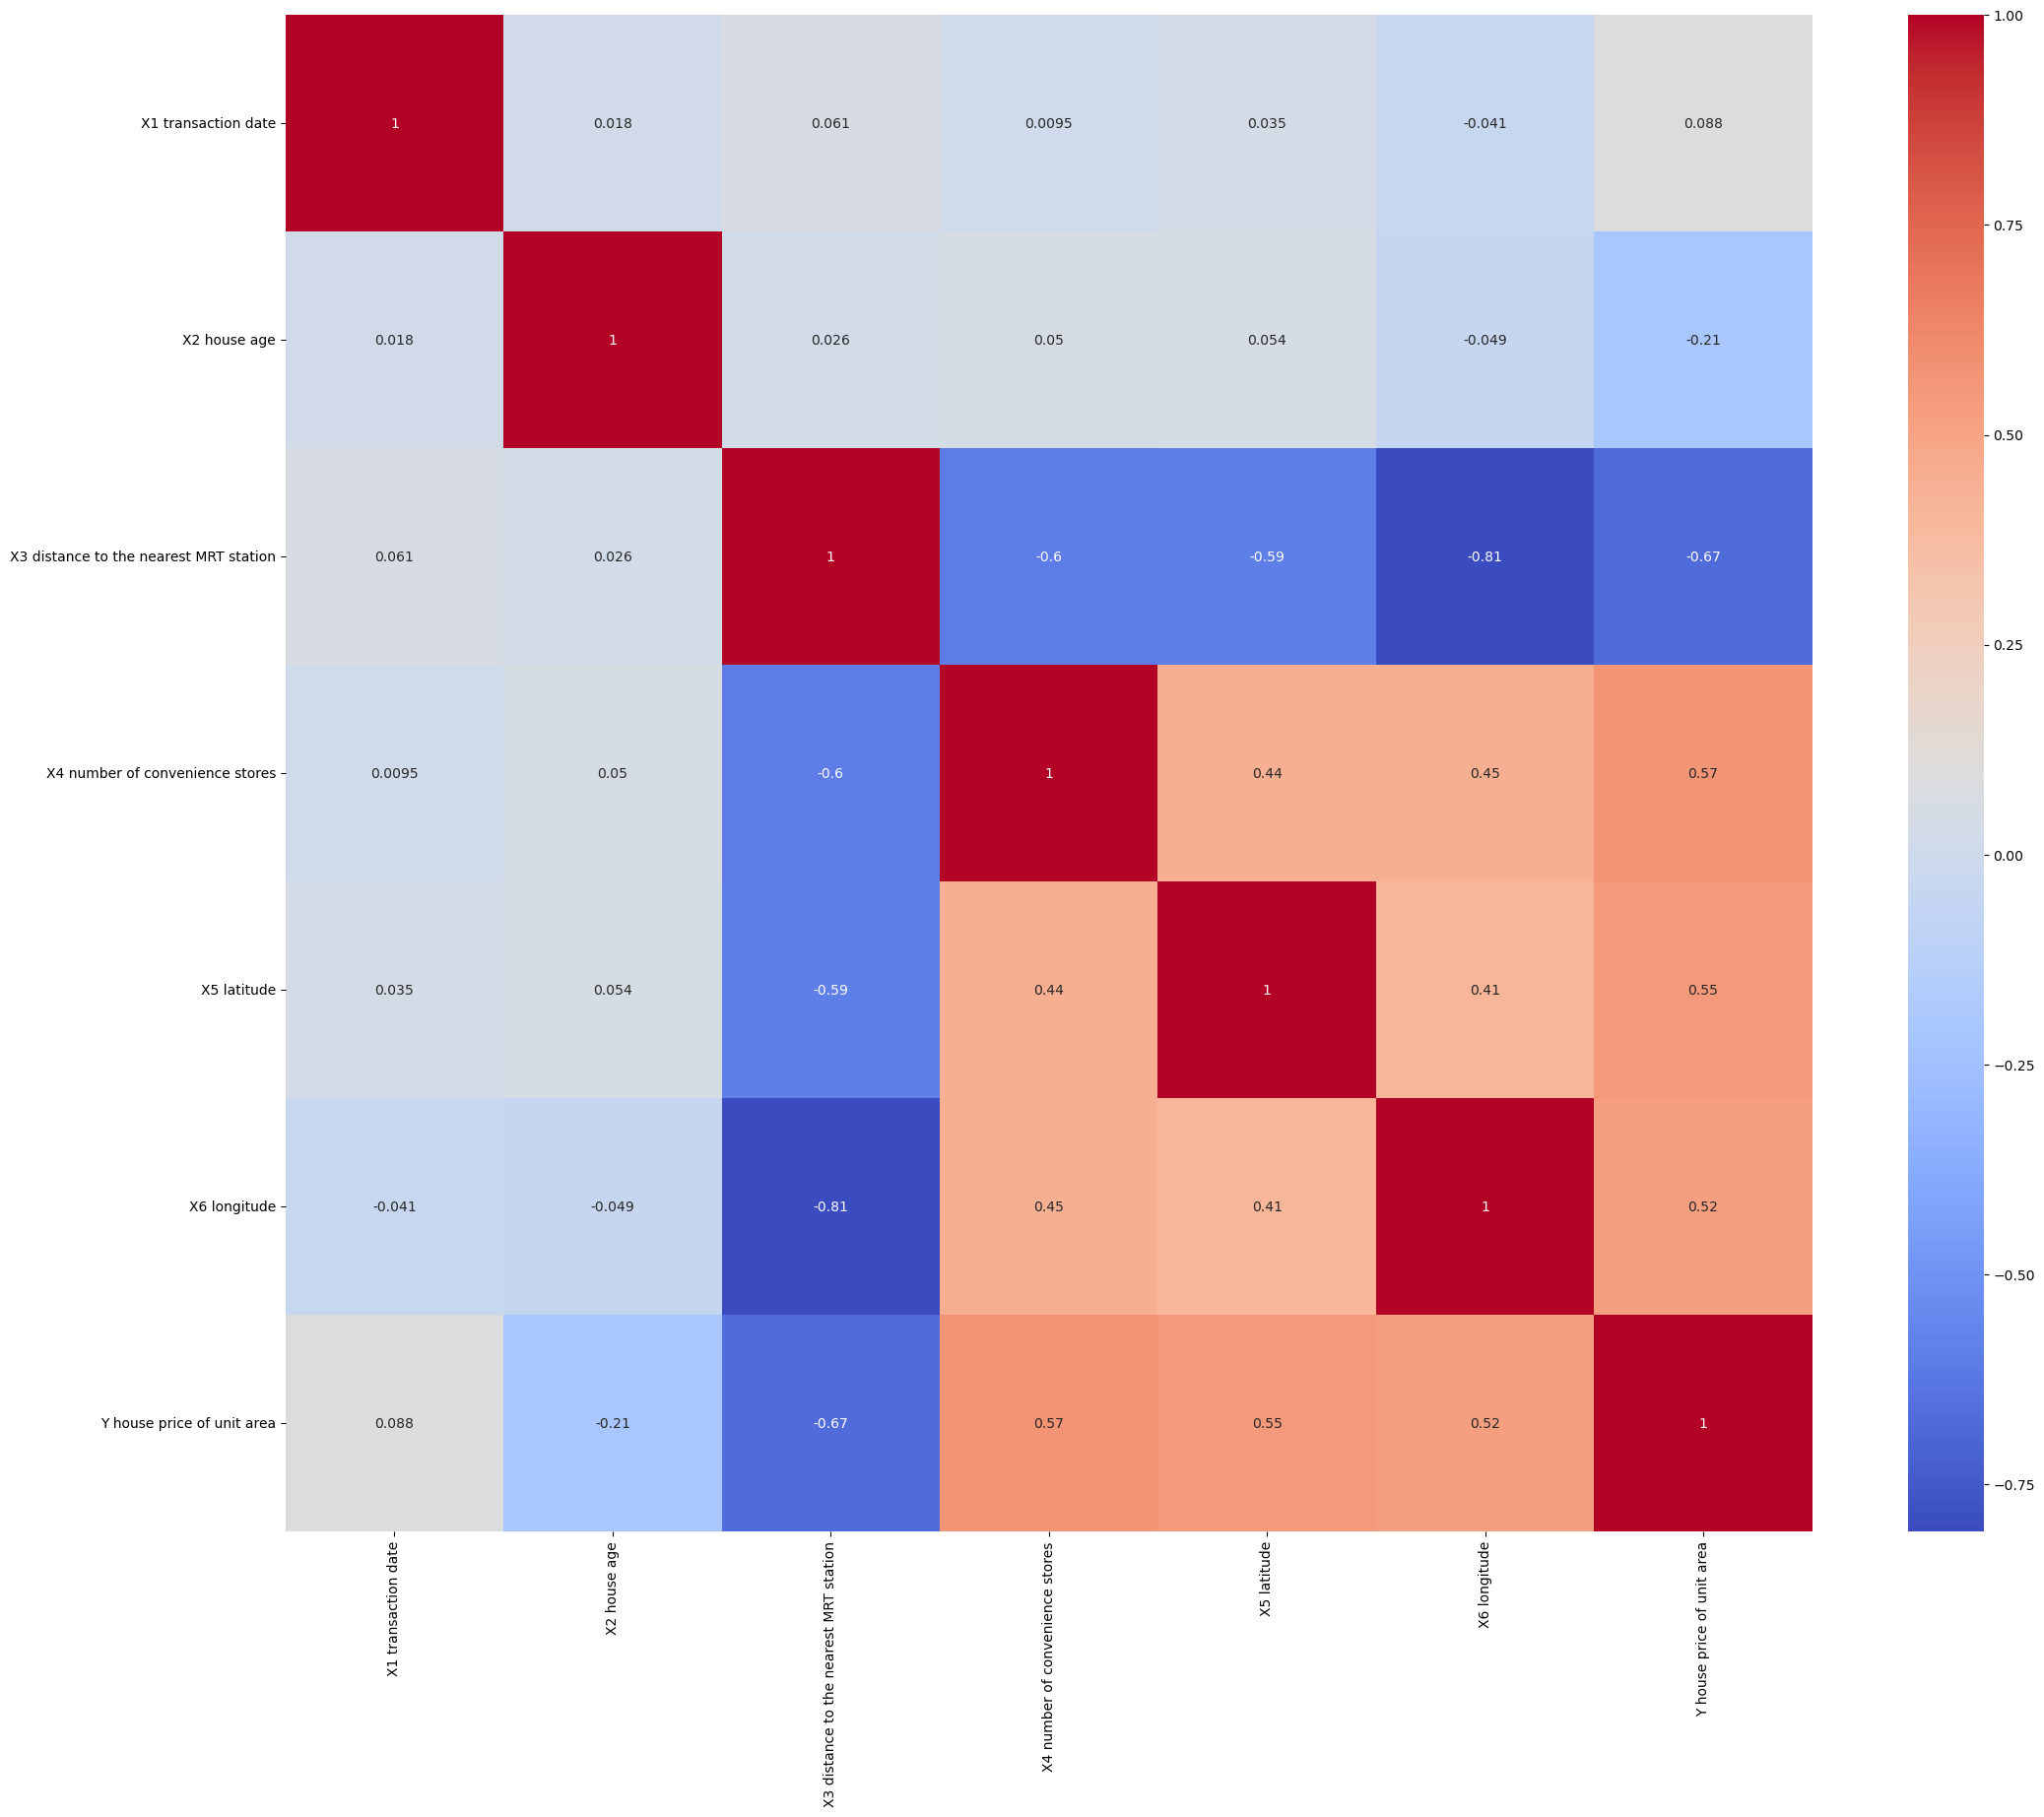

In [5]:
plt.figure(figsize=(25, 20)) 
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

### Преобразование данных

In [6]:
from scipy.stats import mstats

X = df.drop(['Y house price of unit area'], axis=1)
#X = df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = df['Y house price of unit area']

print(X.shape)
print(y.shape)

(414, 6)
(414,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.185, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    r2 = model.score(X_test, y_test)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,2)}\n  R2: {round(R2,2)}\n Adjusted R2: {round(adjusted_r2, 2)}\n Cross Validated R2: {round(CV_R2, 2)}')
    return R2, adjusted_r2, CV_R2, RMSE

### Линейная регрессия

In [10]:
from sklearn.linear_model import LinearRegression

modelLR = LinearRegression()

modelLR.fit(X_train, y_train)

y_pr_LR = modelLR.predict(X_test)

In [11]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  7.28
  R2: 0.7
 Adjusted R2: 0.67
 Cross Validated R2: 0.53


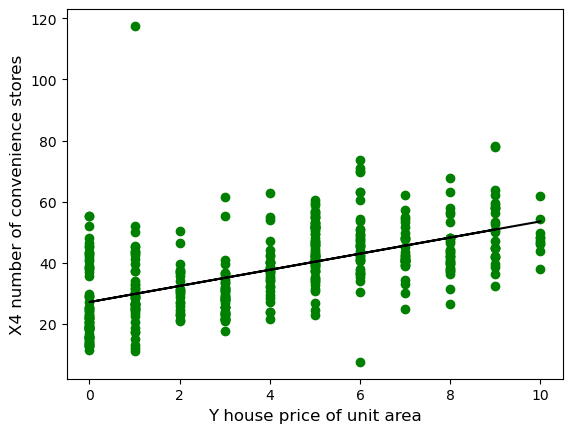

In [12]:
X2 = df['X4 number of convenience stores'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df['Y house price of unit area'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('X4 number of convenience stores', size=12)
plt.xlabel('Y house price of unit area', size=12)
plt.show()

### Полиномиальная регрессия

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.185, random_state=42)

In [14]:
# Create a linear regression model
modelPR = LinearRegression()

# Fit the model to the data
modelPR.fit(X_p_train, y_p_train)

# Predict the response for a new data point
y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  6.43
  R2: 0.76
 Adjusted R2: 0.63
 Cross Validated R2: 0.61


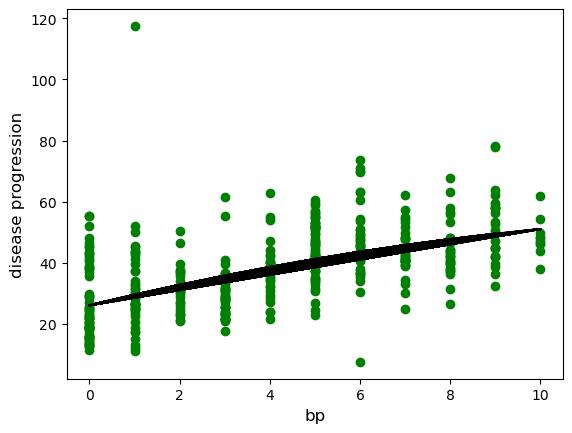

In [15]:
X2 = df['X4 number of convenience stores'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df['Y house price of unit area'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('disease progression', size=12)
plt.xlabel('bp', size=12)
plt.show()

### Регрессия дерева принятия решений

In [16]:
from sklearn.tree import DecisionTreeRegressor

# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  7.31
  R2: 0.69
 Adjusted R2: 0.67
 Cross Validated R2: 0.34


### Регрессия случайного леса

In [17]:
from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor(n_estimators=1500, max_depth=None, max_features='log2', min_samples_leaf=2, min_samples_split=5)

modelRF.fit(X_train, y_train)

y_rf_pred = modelRF.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  5.23
  R2: 0.84
 Adjusted R2: 0.83
 Cross Validated R2: 0.68


### Регрессия опорных векторов

#### modelSVR = SVR(kernel='linear') очень долго обучается

In [18]:
from sklearn.svm import SVR

# Create a support vector regression model. Полиномиальное ядро
modelSVR = SVR(kernel='poly')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  8.38
  R2: 0.6
 Adjusted R2: 0.56
 Cross Validated R2: 0.45


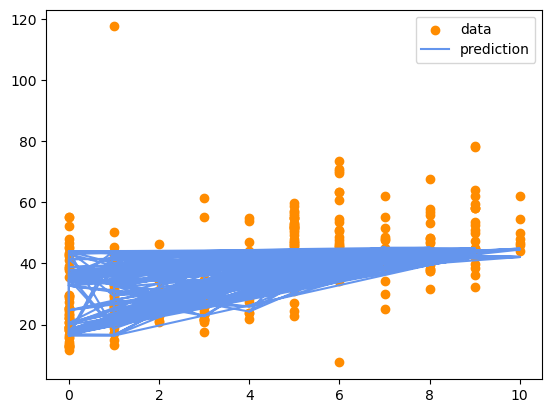

In [19]:
plt.scatter(X_train["X4 number of convenience stores"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["X4 number of convenience stores"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [20]:
# Create a support vector regression model. Ядро - радиальная базисная функция
modelSVR = SVR(kernel='rbf')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  8.3
  R2: 0.6
 Adjusted R2: 0.57
 Cross Validated R2: 0.46


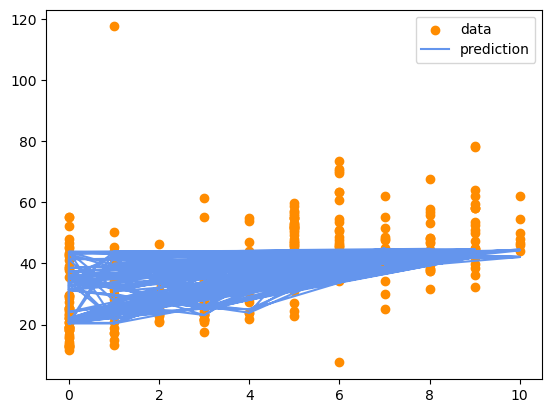

In [21]:
plt.scatter(X_train["X4 number of convenience stores"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["X4 number of convenience stores"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

### Регрессия ElasticNet

In [22]:
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  7.55
  R2: 0.67
 Adjusted R2: 0.65
 Cross Validated R2: 0.51


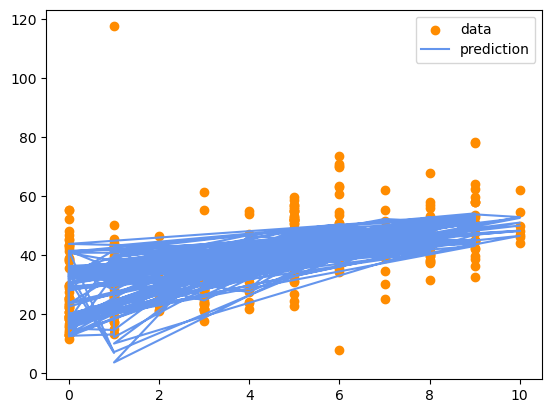

In [23]:
plt.scatter(X_train["X4 number of convenience stores"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["X4 number of convenience stores"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

## Самые лучшие метрики у регрессии случайного леса. Попробуем оптимизировать параметры 

In [25]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_dist = {
    'n_estimators': [200, 300, 500, 1000, 1500, 2000],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt']
}

random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_dist, 
                                   n_iter=50, cv=5, random_state=42, n_jobs=-1, scoring='r2')
random_search.fit(X_train, y_train)

print("Лучшие параметры:", random_search.best_params_)

Лучшие параметры: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}


In [26]:
param_grid = {
    'n_estimators': [200, 300, 500, 1000, 1500, 2000],
    'max_depth': [20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt']
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [27]:
modelRF = RandomForestRegressor(n_estimators=200, max_depth=20, max_features='log2', min_samples_leaf=2, min_samples_split=2)

modelRF.fit(X_train, y_train)

y_rf_pred = modelRF.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  5.25
  R2: 0.84
 Adjusted R2: 0.83
 Cross Validated R2: 0.68


In [28]:
modelRF = RandomForestRegressor(n_estimators=200, max_depth=30, max_features='log2', min_samples_leaf=2, min_samples_split=5)

modelRF.fit(X_train, y_train)

y_rf_pred = modelRF.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  5.33
  R2: 0.84
 Adjusted R2: 0.82
 Cross Validated R2: 0.68


### Коэффициент детерминации в обоих случаях 0.84